In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei']  # 优先微软雅黑/黑体
plt.rcParams['axes.unicode_minus'] = False  # 修复负号显示
data=pd.read_csv(r"D:\MachineLearningTrain\Export_Output.txt",sep=',',index_col=0,encoding='utf-8-sig')
data

,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,Join_Count_12,TARGET_FID_12,Join_Count_12_13,TARGET_FID_12_13,Join_Count_12_13_14,TARGET_FID_12_13_14,...,MID_Y_12_13,END_X_12_13,END_Y_12_13,PART_COUNT_12_13,PNT_COUNT_12_13,EXT_MIN_X_12_13,EXT_MIN_Y_12_13,EXT_MAX_X_12_13,EXT_MAX_Y_12_13,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,0,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021736
2,1,2,0,2,0,2,0,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015697
3,1,3,0,3,0,3,0,3,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023818
4,1,4,0,4,0,4,0,4,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004414
5,1,5,0,5,0,5,0,5,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1,392,0,392,0,392,0,392,0,392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008472
393,1,393,0,393,0,393,1,393,1,393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001899
394,1,394,0,394,0,394,1,394,1,394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002800


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 1 to 396
Columns: 240 entries, Join_Count to EucDist_yanx1
dtypes: float64(192), int64(24), object(24)
memory usage: 745.6+ KB


In [3]:
data.columns

Index(['Join_Count', 'TARGET_FID', 'Join_Count_1', 'TARGET_FID_1',
       'Join_Count_12', 'TARGET_FID_12', 'Join_Count_12_13',
       'TARGET_FID_12_13', 'Join_Count_12_13_14', 'TARGET_FID_12_13_14',
       ...
       'MID_Y_12_13', 'END_X_12_13', 'END_Y_12_13', 'PART_COUNT_12_13',
       'PNT_COUNT_12_13', 'EXT_MIN_X_12_13', 'EXT_MIN_Y_12_13',
       'EXT_MAX_X_12_13', 'EXT_MAX_Y_12_13', 'EucDist_yanx1'],
      dtype='object', length=240)

In [4]:
Y=data.iloc[:,data.columns =="正样本"]
Y

,正样本
OBJECTID,
1,0
2,0
3,0
4,0
5,0
...,...
392,0
393,1
394,1


In [5]:
def data_diagnosis(df):
    # 获取各列数据类型和缺失比例
    missing_ratio = df.isnull().mean().round(4)*100
    dtypes = df.dtypes
    # 检测文本型特征（包含非数字字符的列）
    text_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, str)).any()]
    # 生成诊断报告
    report = pd.DataFrame({'缺失比例%': missing_ratio, '数据类型': dtypes, '是否文本型': [col in text_cols for col in df.columns]})
    return report
print(data_diagnosis(data))

                 缺失比例%     数据类型  是否文本型
Join_Count         0.0    int64  False
TARGET_FID         0.0    int64  False
Join_Count_1       0.0    int64  False
TARGET_FID_1       0.0    int64  False
Join_Count_12      0.0    int64  False
...                ...      ...    ...
EXT_MIN_X_12_13  100.0  float64  False
EXT_MIN_Y_12_13  100.0  float64  False
EXT_MAX_X_12_13  100.0  float64  False
EXT_MAX_Y_12_13  100.0  float64  False
EucDist_yanx1      0.0  float64  False

[240 rows x 3 columns]


In [6]:
import pandas as pd
print(data.isna().sum())

Join_Count           0
TARGET_FID           0
Join_Count_1         0
TARGET_FID_1         0
Join_Count_12        0
                  ... 
EXT_MIN_X_12_13    396
EXT_MIN_Y_12_13    396
EXT_MAX_X_12_13    396
EXT_MAX_Y_12_13    396
EucDist_yanx1        0
Length: 240, dtype: int64


In [7]:
#data.iloc[:,data.columns(missing_ratio) =="正样本"]

In [8]:
# 计算每列缺失值比例
missing_ratio = data.isna().mean()
missing_ratio

Join_Count         0.0
TARGET_FID         0.0
Join_Count_1       0.0
TARGET_FID_1       0.0
Join_Count_12      0.0
                  ... 
EXT_MIN_X_12_13    1.0
EXT_MIN_Y_12_13    1.0
EXT_MAX_X_12_13    1.0
EXT_MAX_Y_12_13    1.0
EucDist_yanx1      0.0
Length: 240, dtype: float64

In [9]:
# 筛选缺失率为 100% 的列
full_missing_cols = missing_ratio[missing_ratio == 1.0].index.tolist()

# 删除这些列
data1 = data.drop(columns=full_missing_cols)
data1

,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,Join_Count_12,TARGET_FID_12,Join_Count_12_13,TARGET_FID_12_13,Join_Count_12_13_14,TARGET_FID_12_13_14,...,POINT_Y_1,pointid_1,grid_code_1,POINT_X_12,POINT_Y_12,pointid_12,grid_code_12,POINT_X_12_13,POINT_Y_12_13,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,0,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021736
2,1,2,0,2,0,2,0,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015697
3,1,3,0,3,0,3,0,3,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023818
4,1,4,0,4,0,4,0,4,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004414
5,1,5,0,5,0,5,0,5,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1,392,0,392,0,392,0,392,0,392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008472
393,1,393,0,393,0,393,1,393,1,393,...,27.663333,47652.0,110.224861,116.339444,27.663333,47652.0,9.323457,116.339444,27.663333,0.001899
394,1,394,0,394,0,394,1,394,1,394,...,27.660556,52830.0,291.297363,116.347500,27.660556,52830.0,14.398109,116.347500,27.660556,0.002800


In [10]:
data1.shape

(396, 148)

In [11]:
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.max_rows', 100)       # 显示前100行数据
print(data1.head(10))                        # 查看前10行完整数据

          Join_Count  TARGET_FID  Join_Count_1  TARGET_FID_1  Join_Count_12  \
OBJECTID                                                                      
1                  1           1             0             1              0   
2                  1           2             0             2              0   
3                  1           3             0             3              0   
4                  1           4             0             4              0   
5                  1           5             0             5              0   
6                  1           6             0             6              0   
7                  1           7             0             7              0   
8                  1           8             0             8              0   
9                  1           9             0             9              0   
10                 1          10             0            10              0   

          TARGET_FID_12  Join_Count_12_13  TARGET_F

In [12]:
# 获取前 18 列的列名
cols_to_drop = data1.columns[:18].tolist()

# 删除这些列
data2 = data1.drop(columns=cols_to_drop)
data2

,CID,POINT_X,POINT_Y,正样本,灾害体,灾害_1,灾害_12,灾害__13,野外编,室内编,省,市,县,乡镇,地理位,经度,纬度,X,Y,Z,治理情,地下水,地震烈,威胁人,威胁财,灾害等,险情等,监测建,毁坏房,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,DOMSOIL,LANDFORM,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,LITHOLOGY,SQKM,INDEX,ISOCSUID,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS_1,SUBCLASS1,RINGS_OK_1,RINGS_NOK_1,NEWSUID_1,DOMSOIL_1,LANDFORM_1,SLOPE_MED_1,RELIEF_MED_1,ELEV_MED_1,SMU_MOD_1,PRID_1,LITHOLOGY_1,SQKM_1,INDEX_1,ISOCSUID_1,AREA_GEO_1,PERIM_GEO_1,CENTROID_X_1,CENTROID_Y_1,INSIDE_X_1,INSIDE_Y_1,START_X_1,START_Y_1,MID_X_1,MID_Y_1,END_X_1,END_Y_1,PART_COUNT_1,PNT_COUNT_1,EXT_MIN_X_1,EXT_MIN_Y_1,EXT_MAX_X_1,EXT_MAX_Y_1,OBJECTID_1,pointid,grid_code,POINT_X_1,POINT_Y_1,pointid_1,grid_code_1,POINT_X_12,POINT_Y_12,pointid_12,grid_code_12,POINT_X_12_13,POINT_Y_12_13,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,116.294526,27.412282,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.364746,7.043690e+09,246.756836,6.125966,1748.583740,0.0,0.0,18,116.294526,27.412282,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021736
2,0.0,116.129084,27.443966,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.152069,5.595937e+09,66.804558,12.969545,1708.555664,0.0,0.0,9,116.129084,27.443966,0.0,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015697
3,0.0,116.303581,27.391269,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.401550,4.131359e+10,103.309563,27.558195,1798.581177,0.0,0.0,18,116.303581,27.391269,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023818
4,0.0,116.243388,27.505975,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [13]:
columns_to_drop = data2.columns[4:29]
columns_to_drop

Index(['灾害体', '灾害_1', '灾害_12', '灾害__13', '野外编', '室内编', '省', '市', '县', '乡镇',
       '地理位', '经度', '纬度', 'X', 'Y', 'Z', '治理情', '地下水', '地震烈', '威胁人', '威胁财',
       '灾害等', '险情等', '监测建', '毁坏房'],
      dtype='object')

In [14]:
data3 = data2.drop(columns=columns_to_drop)

In [15]:
data3

,CID,POINT_X,POINT_Y,正样本,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,DOMSOIL,LANDFORM,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,LITHOLOGY,SQKM,INDEX,ISOCSUID,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS_1,SUBCLASS1,RINGS_OK_1,RINGS_NOK_1,NEWSUID_1,DOMSOIL_1,LANDFORM_1,SLOPE_MED_1,RELIEF_MED_1,ELEV_MED_1,SMU_MOD_1,PRID_1,LITHOLOGY_1,SQKM_1,INDEX_1,ISOCSUID_1,AREA_GEO_1,PERIM_GEO_1,CENTROID_X_1,CENTROID_Y_1,INSIDE_X_1,INSIDE_Y_1,START_X_1,START_Y_1,MID_X_1,MID_Y_1,END_X_1,END_Y_1,PART_COUNT_1,PNT_COUNT_1,EXT_MIN_X_1,EXT_MIN_Y_1,EXT_MAX_X_1,EXT_MAX_Y_1,OBJECTID_1,pointid,grid_code,POINT_X_1,POINT_Y_1,pointid_1,grid_code_1,POINT_X_12,POINT_Y_12,pointid_12,grid_code_12,POINT_X_12_13,POINT_Y_12_13,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,116.294526,27.412282,0,302.364746,7.043690e+09,246.756836,6.125966,1748.583740,0.0,0.0,18,116.294526,27.412282,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021736
2,0.0,116.129084,27.443966,0,241.152069,5.595937e+09,66.804558,12.969545,1708.555664,0.0,0.0,9,116.129084,27.443966,0.0,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015697
3,0.0,116.303581,27.391269,0,568.401550,4.131359e+10,103.309563,27.558195,1798.581177,0.0,0.0,18,116.303581,27.391269,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023818
4,0.0,116.243388,27.505975,0,128.348846,5.466247e+09,178.442246,4.723942,1683.546631,0.0,0.0,9,116.243388,27.505975,0.0,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,24

In [16]:
columns_to_drop = data3.columns[92:104]
columns_to_drop

Index(['pointid', 'grid_code', 'POINT_X_1', 'POINT_Y_1', 'pointid_1',
       'grid_code_1', 'POINT_X_12', 'POINT_Y_12', 'pointid_12', 'grid_code_12',
       'POINT_X_12_13', 'POINT_Y_12_13'],
      dtype='object')

In [17]:
data4 = data3.drop(columns=columns_to_drop)

In [18]:
data4.head()

,CID,POINT_X,POINT_Y,正样本,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,DOMSOIL,LANDFORM,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,LITHOLOGY,SQKM,INDEX,ISOCSUID,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS_1,SUBCLASS1,RINGS_OK_1,RINGS_NOK_1,NEWSUID_1,DOMSOIL_1,LANDFORM_1,SLOPE_MED_1,RELIEF_MED_1,ELEV_MED_1,SMU_MOD_1,PRID_1,LITHOLOGY_1,SQKM_1,INDEX_1,ISOCSUID_1,AREA_GEO_1,PERIM_GEO_1,CENTROID_X_1,CENTROID_Y_1,INSIDE_X_1,INSIDE_Y_1,START_X_1,START_Y_1,MID_X_1,MID_Y_1,END_X_1,END_Y_1,PART_COUNT_1,PNT_COUNT_1,EXT_MIN_X_1,EXT_MIN_Y_1,EXT_MAX_X_1,EXT_MAX_Y_1,OBJECTID_1,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,116.294526,27.412282,0,302.364746,7.043690e+09,246.756836,6.125966,1748.583740,0.0,0.0,18,116.294526,27.412282,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,1.0,0.021736
2,0.0,116.129084,27.443966,0,241.152069,5.595937e+09,66.804558,12.969545,1708.555664,0.0,0.0,9,116.129084,27.443966,0.0,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,2.0,0.015697
3,0.0,116.303581,27.391269,0,568.401550,4.131359e+10,103.309563,27.558195,1798.581177,0.0,0.0,18,116.303581,27.391269,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,3.0,0.023818
4,0.0,116.243388,27.505975,0,128.348846,5.466247e+09,178.442246,4.723942,1683.546631,0.0,0.0,9,116.243388,27.505975,0.0,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,4.0,0.004414
5,0.0,116.253666,27.408413,0,418.600800,5.168396e+09,216.489136,8.408228,

In [19]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 1 to 396
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CID               198 non-null    float64
 1   POINT_X           396 non-null    float64
 2   POINT_Y           396 non-null    float64
 3   正样本               396 non-null    int64  
 4   宜黄dem             394 non-null    float64
 5   曲率                394 non-null    float64
 6   坡向                391 non-null    float64
 7   坡度                391 non-null    float64
 8   yihuangjiangshui  371 non-null    float64
 9   LineDen_shp2      149 non-null    float64
 10  LineDen_shp1      149 non-null    float64
 11  NEAR_FID          396 non-null    int64  
 12  NEAR_X            396 non-null    float64
 13  NEAR_Y            396 non-null    float64
 14  NEAR_ANGLE        396 non-null    float64
 15  AREA              396 non-null    float64
 16  PERIMETER         396 non-null    float64
 17  CH

In [20]:
for i in range(4,11):
    data4.columns[i]
    data4[data4.columns[i]]=data4[data4.columns[i]].fillna(data[data4.columns[i]].mean())#均值填补
    print(data4.columns[i])

宜黄dem
曲率
坡向
坡度
yihuangjiangshui
LineDen_shp2
LineDen_shp1


In [21]:
data4["CID"]=data4["CID"].fillna(data4["CID"].mean())#均值填补

In [22]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 1 to 396
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CID               396 non-null    float64
 1   POINT_X           396 non-null    float64
 2   POINT_Y           396 non-null    float64
 3   正样本               396 non-null    int64  
 4   宜黄dem             396 non-null    float64
 5   曲率                396 non-null    float64
 6   坡向                396 non-null    float64
 7   坡度                396 non-null    float64
 8   yihuangjiangshui  396 non-null    float64
 9   LineDen_shp2      396 non-null    float64
 10  LineDen_shp1      396 non-null    float64
 11  NEAR_FID          396 non-null    int64  
 12  NEAR_X            396 non-null    float64
 13  NEAR_Y            396 non-null    float64
 14  NEAR_ANGLE        396 non-null    float64
 15  AREA              396 non-null    float64
 16  PERIMETER         396 non-null    float64
 17  CH

In [23]:
data4.DOMSOIL

OBJECTID
1      ACh
2      ACh
3      ACh
4      ACh
5      ACh
      ... 
392    ACh
393    ATc
394    ATc
395    ACh
396    ACh
Name: DOMSOIL, Length: 396, dtype: object

In [24]:
#处理分类型特征（文字——编码）
#导入标签提取器
from sklearn.preprocessing import LabelEncoder#标签专用
le=LabelEncoder()#实例化
label=le.fit_transform(data4["DOMSOIL"])
le.classes_#查看标签中类别

array(['ACh', 'ACu', 'ALh', 'ATc'], dtype=object)

In [25]:
#简写
data4["DOMSOIL"]=LabelEncoder().fit_transform(data4["DOMSOIL"])
data4["SUBCLASS"]=LabelEncoder().fit_transform(data4["SUBCLASS"])
data4["LITHOLOGY"]=LabelEncoder().fit_transform(data4["LITHOLOGY"])
data4["SUBCLASS_1"]=LabelEncoder().fit_transform(data4["SUBCLASS_1"])

In [26]:
data4.head()

,CID,POINT_X,POINT_Y,正样本,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,DOMSOIL,LANDFORM,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,LITHOLOGY,SQKM,INDEX,ISOCSUID,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS_1,SUBCLASS1,RINGS_OK_1,RINGS_NOK_1,NEWSUID_1,DOMSOIL_1,LANDFORM_1,SLOPE_MED_1,RELIEF_MED_1,ELEV_MED_1,SMU_MOD_1,PRID_1,LITHOLOGY_1,SQKM_1,INDEX_1,ISOCSUID_1,AREA_GEO_1,PERIM_GEO_1,CENTROID_X_1,CENTROID_Y_1,INSIDE_X_1,INSIDE_Y_1,START_X_1,START_Y_1,MID_X_1,MID_Y_1,END_X_1,END_Y_1,PART_COUNT_1,PNT_COUNT_1,EXT_MIN_X_1,EXT_MIN_Y_1,EXT_MAX_X_1,EXT_MAX_Y_1,OBJECTID_1,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,116.294526,27.412282,0,302.364746,7.043690e+09,246.756836,6.125966,1748.583740,0.0,0.0,18,116.294526,27.412282,0.0,0.019315,0.923969,54778.0,54853.0,0,5005.0,1,0,198.0,0,SM,13.8,154.0,202.0,1808.0,10053.0,4,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,0.019315,0.923969,54778.0,54853.0,0,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,1.0,0.021736
2,0.0,116.129084,27.443966,0,241.152069,5.595937e+09,66.804558,12.969545,1708.555664,0.0,0.0,9,116.129084,27.443966,0.0,0.303340,14.851678,54185.0,54260.0,0,4168.0,11,0,141.0,0,SH,27.1,240.0,529.0,1805.0,10033.0,0,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,0.303340,14.851678,54185.0,54260.0,0,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,2.0,0.015697
3,0.0,116.303581,27.391269,0,568.401550,4.131359e+10,103.309563,27.558195,1798.581177,0.0,0.0,18,116.303581,27.391269,0.0,0.019315,0.923969,54778.0,54853.0,0,5005.0,1,0,198.0,0,SM,13.8,154.0,202.0,1808.0,10053.0,4,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,0.019315,0.923969,54778.0,54853.0,0,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,3.0,0.023818
4,0.0,116.243388,27.505975,0,128.348846,5.466247e+09,178.442246,4.723942,1683.546631,0.0,0.0,9,116.243388,27.505975,0.0,0.303340,14.851678,54185.0,54260.0,0,4168.0,11,0,141.0,0,SH,27.1,240.0,529.0,1805.0,10033.0,0,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,0.303340,14.851678,54185.0,54260.0,0,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,4.0,0.004414
5,0.0,116.253666,27.408413,0,418.600800,5.168396e+09,216.489136,8.408228,1740.913208,0.0,0.0,18,116.253666,27.408

In [27]:
columns_to_drop = data2.columns[84:117]
columns_to_drop

Index(['RINGS_OK_1', 'RINGS_NOK_1', 'NEWSUID_1', 'DOMSOIL_1', 'LANDFORM_1',
       'SLOPE_MED_1', 'RELIEF_MED_1', 'ELEV_MED_1', 'SMU_MOD_1', 'PRID_1',
       'LITHOLOGY_1', 'SQKM_1', 'INDEX_1', 'ISOCSUID_1', 'AREA_GEO_1',
       'PERIM_GEO_1', 'CENTROID_X_1', 'CENTROID_Y_1', 'INSIDE_X_1',
       'INSIDE_Y_1', 'START_X_1', 'START_Y_1', 'MID_X_1', 'MID_Y_1', 'END_X_1',
       'END_Y_1', 'PART_COUNT_1', 'PNT_COUNT_1', 'EXT_MIN_X_1', 'EXT_MIN_Y_1',
       'EXT_MAX_X_1', 'EXT_MAX_Y_1', 'OBJECTID_1'],
      dtype='object')

In [28]:
data4 = data4.drop(columns=columns_to_drop)

#哑变量操作

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 定义需要哑变量化的列名列表
cat_cols = ["DOMSOIL", "SUBCLASS", "LITHOLOGY","SUBCLASS_1","ISOCSUID","LANDFORM"]  # 根据实际列名修改

# 创建预处理管道
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'  # 保留其他列（如数值型）
)

# 执行转换并获取列名
X_transformed = preprocessor.fit_transform(data4)
feature_names = preprocessor.get_feature_names_out(input_features=data4.columns)

# 直接生成带新列名的DataFrame
newdata = pd.DataFrame(X_transformed, columns=feature_names)
newdata.columns = [col.split("__")[-1] for col in feature_names]

In [30]:
newdata

,DOMSOIL_1,DOMSOIL_2,DOMSOIL_3,LITHOLOGY_1,LITHOLOGY_2,LITHOLOGY_3,LITHOLOGY_4,LITHOLOGY_5,ISOCSUID_CN 118,ISOCSUID_CN 119,ISOCSUID_CN 128,ISOCSUID_CN 139,ISOCSUID_CN 141,ISOCSUID_CN 165,ISOCSUID_CN 198,ISOCSUID_CN 312,ISOCSUID_CN 526,ISOCSUID_CN 535,ISOCSUID_CN 766,ISOCSUID_CN 774,LANDFORM_SH,LANDFORM_SM,LANDFORM_TM,CID,POINT_X,POINT_Y,正样本,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,SQKM,INDEX,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS1,EucDist_yanx1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.294526,27.412282,0.0,302.364746,7.043690e+09,246.756836,6.125966,1748.583740,0.000000,0.000000,18.0,116.294526,27.412282,0.0,0.019315,0.923969,54778.0,54853.0,5005.0,1.0,0.0,198.0,13.8,154.0,202.0,1808.0,10053.0,211.723736,1.0,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,5005.0,0.021736
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,116.129084,27.443966,0.0,241.152069,5.595937e+09,66.804558,12.969545,1708.555664,0.000000,0.000000,9.0,116.129084,27.443966,0.0,0.303340,14.851678,54185.0,54260.0,4168.0,11.0,0.0,141.0,27.1,240.0,529.0,1805.0,10033.0,3339.064421,1.0,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,0.303340,14.851678,54185.0,54260.0,4168.0,0.015697
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.303581,27.391269,0.0,568.401550,4.131359e+10,103.309563,27.558195,1798.581177,0.000000,0.000000,18.0,116.303581,27.391269,0.0,0.019315,0.923969,54778.0,54853.0,5005.0,1.0,0.0,198.0,13.8,154.0,202.0,1808.0,10053.0,211.723736,1.0,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,5005.0,0.023818
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,116.243388,27.505975,0.0,128.348846,5.466247e+09,178.442246,4.723942,1683.546631,0.000000,0.000000,9.0,116.243388,27.505975,0.0,0.303340,14.851678,54185.0,54260.0,4168.0,11.0,0.0,141.0,27.1,240.0,529.0,1805.0,10033.0,3339.064421,1.0,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,0.303340,14.851678,54185.0,54260.0,4168.0,0.004414
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.253666,27.408413,0.0,418.600800,5.168396e+09,216.489136,8.408228,1740.913208,0.000000,0.000000,18.0,116.253666,27.408413,0.0,0.019315,0.923969,54778.0,54853.0,5005.0,1.0,0.0,198.0,13.8,154.0,202.0,1808.0,10053.0,211.723736,1.0,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,5005.0,0.033692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

标准化

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler #
scaler=MinMaxScaler()#实例化
for i in range(27,77):
    newdata.columns[i]
    print(newdata.columns[i])
    newdata[newdata.columns[i]] = scaler.fit_transform(newdata[newdata.columns[i]].values.reshape(-1,1))

宜黄dem
曲率
坡向
坡度
yihuangjiangshui
LineDen_shp2
LineDen_shp1
NEAR_FID
NEAR_X
NEAR_Y
NEAR_ANGLE
AREA
PERIMETER
CHINA_PC_
CHINA_PC_I
SUBCLASS_
RINGS_OK
RINGS_NOK
NEWSUID
SLOPE_MED
RELIEF_MED
ELEV_MED
SMU_MOD
PRID
SQKM
INDEX
AREA_GEO
PERIM_GEO
CENTROID_X
CENTROID_Y
INSIDE_X
INSIDE_Y
START_X
START_Y
MID_X
MID_Y
END_X
END_Y
PART_COUNT
PNT_COUNT
EXT_MIN_X
EXT_MIN_Y
EXT_MAX_X
EXT_MAX_Y
AREA_1
PERIMETER_1
CHINA_PC1
CHINA_PC_I_1
SUBCLASS1
EucDist_yanx1


In [32]:
newdata

,DOMSOIL_1,DOMSOIL_2,DOMSOIL_3,LITHOLOGY_1,LITHOLOGY_2,LITHOLOGY_3,LITHOLOGY_4,LITHOLOGY_5,ISOCSUID_CN 118,ISOCSUID_CN 119,ISOCSUID_CN 128,ISOCSUID_CN 139,ISOCSUID_CN 141,ISOCSUID_CN 165,ISOCSUID_CN 198,ISOCSUID_CN 312,ISOCSUID_CN 526,ISOCSUID_CN 535,ISOCSUID_CN 766,ISOCSUID_CN 774,LANDFORM_SH,LANDFORM_SM,LANDFORM_TM,CID,POINT_X,POINT_Y,正样本,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,SQKM,INDEX,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS1,EucDist_yanx1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.294526,27.412282,0.0,0.230893,0.538043,0.693200,0.126023,0.270685,0.000000,0.000000,0.695652,0.588500,0.558764,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.516201
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,116.129084,27.443966,0.0,0.174464,0.520588,0.187670,0.285992,0.136139,0.000000,0.000000,0.304348,0.198744,0.609142,0.0,1.000000,1.000000,0.223781,0.223781,0.074623,1.0,0.0,0.022593,0.755556,0.630303,0.526190,0.841004,0.000199,1.000000,0.0,1.000000,1.000000,0.348331,0.238473,0.701421,0.566135,0.783378,0.704957,0.420609,0.000000,0.256548,0.000000,0.0,1.000000,0.031867,0.000000,0.903295,0.674734,1.000000,1.000000,0.223781,0.223781,0.074623,0.371207
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.303581,27.391269,0.0,0.476140,0.951218,0.290221,0.627002,0.438742,0.000000,0.000000,0.695652,0.609832,0.525352,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.566209
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,116.243388,27.505975,0.0,0.070476,0.519024,0.501288,0.093251,0.052076,0.000000,0.000000,0.304348,0.468028,0.707740,0.0,1.000000,1.000000,0.223781,0.223781,0.074623,1.0,0.0,0.022593,0.755556,0.630303,0.526190,0.841004,0.000199,1.000000,0.0,1.000000,1.000000,0.348331,0.238473,0.701421,0.566135,0.783378,0.704957,0.420609,0.000000,0.256548,0.000000,0.0,1.000000,0.031867,0.000000,0.903295,0.674734,1.000000,1.000000,0.223781,0.223781,0.074623,0.100298
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.253666,27.408413,0.0,0.338046,0.515433,0.608171,0.179371,0.244902,0.000000,0.000000,0.695652,0.492241,0.552612,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.803290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,116.403142,27.634599,0.0,0.067934,0.226545,0.736634,0.226428

In [33]:
# 归一化到 [0,1]（适用大部分模型）
X = newdata.loc[:, newdata.columns != "正样本"].copy()  # 创建独立副本
X["POINT_X"] = (X["POINT_X"] + 180) / 360  # 经度范围 [-180,180] → [0,1]
X["POINT_Y"] = (X["POINT_Y"] + 90) / 180   # 纬度范围 [-90,90] → [0,1]
X

,DOMSOIL_1,DOMSOIL_2,DOMSOIL_3,LITHOLOGY_1,LITHOLOGY_2,LITHOLOGY_3,LITHOLOGY_4,LITHOLOGY_5,ISOCSUID_CN 118,ISOCSUID_CN 119,ISOCSUID_CN 128,ISOCSUID_CN 139,ISOCSUID_CN 141,ISOCSUID_CN 165,ISOCSUID_CN 198,ISOCSUID_CN 312,ISOCSUID_CN 526,ISOCSUID_CN 535,ISOCSUID_CN 766,ISOCSUID_CN 774,LANDFORM_SH,LANDFORM_SM,LANDFORM_TM,CID,POINT_X,POINT_Y,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,SQKM,INDEX,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS1,EucDist_yanx1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.823040,0.652290,0.230893,0.538043,0.693200,0.126023,0.270685,0.000000,0.000000,0.695652,0.588500,0.558764,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.516201
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.822581,0.652466,0.174464,0.520588,0.187670,0.285992,0.136139,0.000000,0.000000,0.304348,0.198744,0.609142,0.0,1.000000,1.000000,0.223781,0.223781,0.074623,1.0,0.0,0.022593,0.755556,0.630303,0.526190,0.841004,0.000199,1.000000,0.0,1.000000,1.000000,0.348331,0.238473,0.701421,0.566135,0.783378,0.704957,0.420609,0.000000,0.256548,0.000000,0.0,1.000000,0.031867,0.000000,0.903295,0.674734,1.000000,1.000000,0.223781,0.223781,0.074623,0.371207
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.823066,0.652174,0.476140,0.951218,0.290221,0.627002,0.438742,0.000000,0.000000,0.695652,0.609832,0.525352,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.566209
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.822898,0.652811,0.070476,0.519024,0.501288,0.093251,0.052076,0.000000,0.000000,0.304348,0.468028,0.707740,0.0,1.000000,1.000000,0.223781,0.223781,0.074623,1.0,0.0,0.022593,0.755556,0.630303,0.526190,0.841004,0.000199,1.000000,0.0,1.000000,1.000000,0.348331,0.238473,0.701421,0.566135,0.783378,0.704957,0.420609,0.000000,0.256548,0.000000,0.0,1.000000,0.031867,0.000000,0.903295,0.674734,1.000000,1.000000,0.223781,0.223781,0.074623,0.100298
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.822927,0.652269,0.338046,0.515433,0.608171,0.179371,0.244902,0.000000,0.000000,0.695652,0.492241,0.552612,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.803290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.823342,0.653526,0.067934,0.226545,0.736634,0.226428,0.156449,0.099768,0.091104,0.260870,0.844383,0.91

方差过滤法

In [34]:
X.shape

(396, 76)

In [35]:
X1=X.drop(['POINT_X','POINT_Y','NEAR_X','NEAR_Y'],axis=1)

In [38]:
# 删除所有确定无关特征（必须执行）
redundant_features = [
    # 地理坐标与几何中心点
    'CENTROID_X', 'CENTROID_Y', 
    'POINT_X', 'POINT_Y', 
    'NEAR_X', 'NEAR_Y',
    'INSIDE_X', 'INSIDE_Y',
    'START_X', 'START_Y',
    'MID_X', 'MID_Y',
    'END_X', 'END_Y',
    'EXT_MIN_X', 'EXT_MIN_Y',
    'EXT_MAX_X', 'EXT_MAX_Y',

    # 几何属性（面积/周长/长度等）
    'AREA', 'PERIMETER',
    'AREA_1', 'PERIMETER_1',
    'AREA_GEO', 'PERIM_GEO',
    'SQKM', 'INDEX',

    # 拓扑关系与标识符
    'CID', 'NEAR_FID', 'NEWSUID',
    'PRID', 'SMU_MOD', 'PART_COUNT',
    'PNT_COUNT', 'RINGS_OK', 'RINGS_NOK',

    # 冗余分类编码原始列（OneHot后需删除）
    'ISOCSUID_CN 118', 'ISOCSUID_CN 119',
    'ISOCSUID_CN 128', 'ISOCSUID_CN 139',
    'ISOCSUID_CN 141', 'ISOCSUID_CN 165',
    'ISOCSUID_CN 198', 'ISOCSUID_CN 312',
    'ISOCSUID_CN 526', 'ISOCSUID_CN 535',
    'ISOCSUID_CN 766', 'ISOCSUID_CN 774',

    # 其他无关字段
    'LineDen_shp1', 'LineDen_shp2',  # 线密度重复项
    'CHINA_PC_', 'CHINA_PC1',        # 重复社会经济指标
    'SUBCLASS_', 'SUBCLASS1'         # 子类标识符
]
#X_filtered = X.drop(columns=redundant_features)
X_filtered = X.drop(columns=redundant_features).reset_index(drop=True)
#Y = Y.reset_index(drop=True)  # 确保Y与X同步重置

X_filtered

# 对分类变量进行目标编码（替代OneHot）

#cat_features = ['ISOCSUID_CN 118','ISOCSUID_CN 119','ISOCSUID_CN 128','ISOCSUID_CN 139','ISOCSUID_CN 141','ISOCSUID_CN 165','ISOCSUID_CN 198','ISOCSUID_CN 312','ISOCSUID_CN 526','ISOCSUID_CN 535','ISOCSUID_CN 766','ISOCSUID_CN 774']  # 所有ISOCSUID_CN列

,DOMSOIL_1,DOMSOIL_2,DOMSOIL_3,LITHOLOGY_1,LITHOLOGY_2,LITHOLOGY_3,LITHOLOGY_4,LITHOLOGY_5,LANDFORM_SH,LANDFORM_SM,LANDFORM_TM,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,NEAR_ANGLE,CHINA_PC_I,SLOPE_MED,RELIEF_MED,ELEV_MED,CHINA_PC_I_1,EucDist_yanx1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.230893,0.538043,0.693200,0.126023,0.270685,0.0,0.661743,0.333333,0.369697,0.136905,0.661743,0.516201
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.174464,0.520588,0.187670,0.285992,0.136139,0.0,0.223781,0.755556,0.630303,0.526190,0.223781,0.371207
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.476140,0.951218,0.290221,0.627002,0.438742,0.0,0.661743,0.333333,0.369697,0.136905,0.661743,0.566209
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.070476,0.519024,0.501288,0.093251,0.052076,0.0,0.223781,0.755556,0.630303,0.526190,0.223781,0.100298
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.338046,0.515433,0.608171,0.179371,0.244902,0.0,0.661743,0.333333,0.369697,0.136905,0.661743,0.803290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.067934,0.226545,0.736634,0.226428,0.156449,0.0,0.200886,0.292063,0.372727,0.101190,0.200886,0.197723
392,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.026827,0.375000,0.309651,0.200764,0.031393,0.0,0.129985,0.034921,0.000000,0.000000,0.129985,0.039911
393,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.041577,0.328117,0.818326,0.319384,0.042472,0.0,0.129985,0.034921,0.000000,0.000000,0.129985,0.061547
394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058170,0.562493,0.202686,0.312547,0.236758,0.0,0.000000,0.139683,0.109091,0.039286,0.000000,0.010269


In [59]:
import numpy as np

# 1. 地形与水文的交互效应 --------------------------------------------------------
# 坡度×降水：捕捉陡坡区域在高降水下的滑坡敏感性
X_filtered['slope_rain_interaction'] = X_filtered['坡度'] * X_filtered['yihuangjiangshui']

# 曲率×高程：地形曲率与高程联合作用（如山顶/山谷稳定性差异）
X_filtered['curvature_elevation'] = X_filtered['曲率'] * X_filtered['宜黄dem']

# 2. 非线性变换 --------------------------------------------------------------
# 坡度的平方：捕捉极端坡度的影响（如 >45° 的区域）
X_filtered['slope_squared'] = X_filtered['坡度'] ** 2

# 曲率的绝对值：负曲率（山谷）和正曲率（山脊）可能对滑坡贡献不同
X_filtered['curvature_abs'] = np.abs(X_filtered['曲率'])

# 3. 地质条件与距离的复合指标 --------------------------------------------------
# 岩性稳定性加权距离：假设LITHOLOGY_1为不稳定岩类，权重为2，其他为1
X_filtered['litho_distance'] = X_filtered['LITHOLOGY_1'] * 2 * X_filtered['EucDist_yanx1'] + \
                             (1 - X_filtered['LITHOLOGY_1']) * X_filtered['EucDist_yanx1']






In [60]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold()
X_var=selector.fit_transform(X_filtered)
X_var.shape

(396, 27)

In [61]:
pd.DataFrame(X_var).head()#提供头标

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.230893,0.538043,0.693200,0.126023,0.270685,0.661743,0.333333,0.369697,0.136905,0.661743,0.516201,0.034113,0.124230,0.015882,0.538043,0.516201
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.174464,0.520588,0.187670,0.285992,0.136139,0.223781,0.755556,0.630303,0.526190,0.223781,0.371207,0.038935,0.090824,0.081791,0.520588,0.371207
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.476140,0.951218,0.290221,0.627002,0.438742,0.661743,0.333333,0.369697,0.136905,0.661743,0.566209,0.275092,0.452913,0.393132,0.951218,0.566209
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.070476,0.519024,0.501288,0.093251,0.052076,0.223781,0.755556,0.630303,0.526190,0.223781,0.100298,0.004856,0.036579,0.008696,0.519024,0.100298
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.338046,0.515433,0.608171,0.179371,0.244902,0.661743,0.333333,0.369697,0.136905,0.661743,0.803290,0.043928,0.174240,0.032174,0.515433,0.803290


相关性过滤 1.卡方过滤

In [63]:
#Y = Y.values.ravel()

In [64]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE(random_state=42)
#X_t,Y_t=smote.fit_resample(X,Y)

In [65]:
from sklearn.feature_selection import SelectKBest#选K个分数最高的特征的类
from sklearn.ensemble import RandomForestClassifier as RFC#随机森林
from sklearn.feature_selection import chi2  #卡方检验
from sklearn.model_selection import cross_val_score   #交叉验证
from sklearn.feature_selection import mutual_info_classif as MIC#互信息法
# 计算互信息得分
from sklearn.feature_selection import mutual_info_classif as MIC
result=MIC(X_var,Y)#互信息量估计
k=result.shape[0]-sum(result<=0)
k

np.int64(20)

In [66]:
X_1=SelectKBest(chi2,k=20).fit_transform(X_var,Y)##这里很奇妙，这个K值的分数居然更高
cross_val_score(RFC(n_estimators=10,class_weight='balanced',random_state=0),X_1,Y,cv=5).mean()

np.float64(0.5151265822784811)

嵌入法

In [67]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC#随机森林
RFC_=RFC(n_estimators=10,class_weight='balanced',random_state=0)#实例化
X_e=SelectFromModel(RFC_,threshold=0.005).fit_transform(X1,Y)#实例化嵌入法
X_e.shape

(396, 17)

模型维度明显降低（可通过学习曲线找最佳阈值如下）

In [68]:
import numpy as np
import matplotlib.pyplot as plt
RFC_.fit(X1,Y).feature_importances_
threshold=np.linspace(0,(RFC_.fit(X1,Y).feature_importances_).max(),20)
score=[]

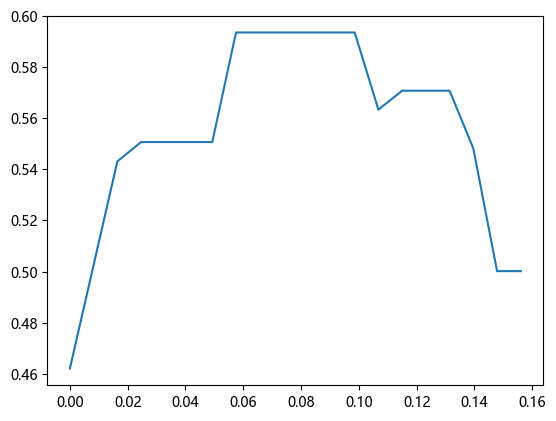

In [69]:
for i in threshold:
    X_1=SelectFromModel(RFC_,threshold=i).fit_transform(X1,Y)
    once=cross_val_score(RFC_,X_1,Y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [70]:
X_e=SelectFromModel(RFC_,threshold=0.07).fit_transform(X1,Y)
X_e.shape

(396, 6)

In [71]:
cross_val_score(RFC(n_estimators=100,class_weight='balanced',random_state=0),X_e,Y,cv=5).mean()

np.float64(0.5354113924050633)

特征相关性分析

最优特征数量: 16
被保留的特征掩码:
 [False False False False False False False False False False False  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True]
被保留的特征名称:
 ['宜黄dem', '曲率', '坡向', '坡度', 'yihuangjiangshui', 'CHINA_PC_I', 'SLOPE_MED', 'RELIEF_MED', 'ELEV_MED', 'CHINA_PC_I_1', 'EucDist_yanx1', 'slope_rain_interaction', 'curvature_elevation', 'slope_squared', 'curvature_abs', 'litho_distance']
特征排名（数值越小越重要）:
 [3 6 5 4 5 3 2 6 2 4 7 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1]


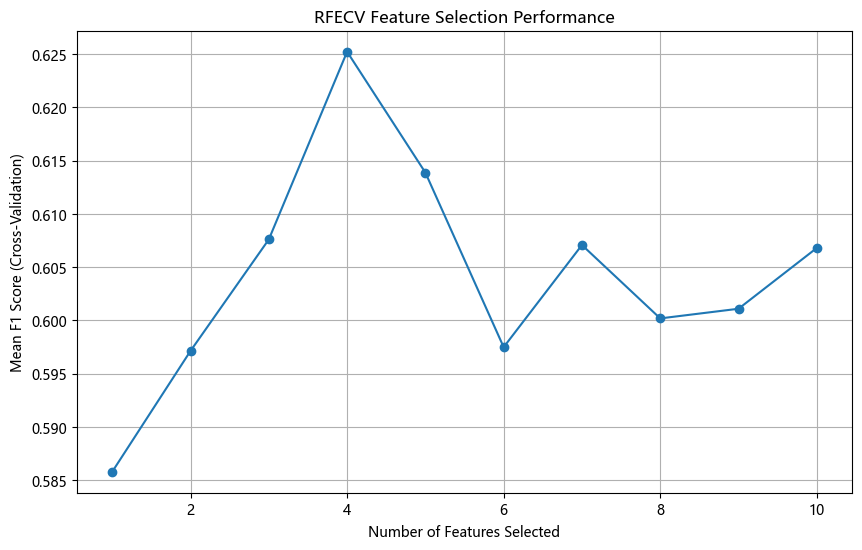

交叉验证F1分数均值: 0.4991
交叉验证F1分数标准差: 0.0484


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# ------------------------------------------------
# 步骤1：准备数据（假设X和Y已定义）
# ------------------------------------------------
# X: 特征矩阵，形状为(n_samples, n_features)
# Y: 目标变量（0或1），形状为(n_samples,)
# 例如：X = df.drop(['landslide'], axis=1), Y = df['landslide']

# 确保特征名称可读（可选）
feature_names = X_filtered.columns.tolist()  # 假设X是DataFrame

# ------------------------------------------------
# 步骤2：创建RFECV选择器
# ------------------------------------------------
# 定义基模型（建议调参后的模型，避免过简单）
estimator = RandomForestClassifier(
    n_estimators=200,  # 增加树的数量以提高稳定性
    max_depth=8,
    min_samples_split=10,
    class_weight='balanced',  # 处理类别不平衡
    random_state=42
)

# 创建RFECV对象
selector = RFECV(
    estimator=estimator,
    step=2,           # 每次迭代删除2个特征
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  # 分层交叉验证
    scoring='f1',     # 使用F1分数（滑坡预测关注正类）
    min_features_to_select=10,  # 至少保留5个特征
    n_jobs=-1         # 使用全部CPU核心加速
)

# ------------------------------------------------
# 步骤3：训练选择器并获取结果
# ------------------------------------------------
selector.fit(X_filtered, Y)  # 输入特征矩阵和目标变量

# ------------------------------------------------
# 步骤4：分析输出结果
# ------------------------------------------------
# 获取最优特征数量
optimal_num_features = selector.n_features_
print(f"最优特征数量: {optimal_num_features}")

# 获取被保留的特征布尔掩码
selected_mask = selector.support_
print("被保留的特征掩码:\n", selected_mask)

# 获取被保留的特征名称（如果X是DataFrame）
selected_features = X_filtered.columns[selected_mask].tolist()
print("被保留的特征名称:\n", selected_features)

# 获取特征排名（1表示最重要，越大越不重要）
feature_ranking = selector.ranking_
print("特征排名（数值越小越重要）:\n", feature_ranking)

# 获取交叉验证得分随特征数量的变化
cv_scores = selector.cv_results_['mean_test_score']

# ------------------------------------------------
# 步骤5：可视化特征选择过程
# ------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Mean F1 Score (Cross-Validation)")
plt.title("RFECV Feature Selection Performance")
plt.grid(True)
plt.show()

# ------------------------------------------------
# 步骤6：生成最终筛选后的数据集
# ------------------------------------------------
X_selected = selector.transform(X_filtered)  # 输出为NumPy数组
# 转换为DataFrame（可选）
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# ------------------------------------------------
# 步骤7：验证筛选后特征的效果
# ------------------------------------------------
from sklearn.model_selection import cross_val_score

# 使用筛选后的特征重新训练模型
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
scores = cross_val_score(model, X_selected, Y, cv=5, scoring='f1')

print("交叉验证F1分数均值:", np.mean(scores).round(4))
print("交叉验证F1分数标准差:", np.std(scores).round(4))

In [73]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

# 使用调参后的随机森林
RFC_optimized = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

# 动态选择阈值
thresholds = np.linspace(0.01,0.1,50)
#thresholds = np.linspace(0, RFC_optimized.fit(X1, Y).feature_importances_.max(), 50)
best_score = 0
best_threshold = 0

for thresh in thresholds:
    selector = SelectFromModel(RFC_optimized, threshold=thresh)
    X_selected = selector.fit_transform(X_filtered, Y)
    if X_selected.shape[1] == 0:  # 避免空特征
        continue
    score = cross_val_score(RFC_optimized, X_selected, Y, cv=5, scoring='f1').mean()
    if score > best_score:
        best_score = score
        best_threshold = thresh

print(f"Best Threshold: {best_threshold:.4f}, F1: {best_score:.4f}")

D:\MachineLearning\envs\ml_env\lib\site-packages\sklearn\feature_selection\_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


Best Threshold: 0.0743, F1: 0.5873


D:\MachineLearning\envs\ml_env\lib\site-packages\sklearn\feature_selection\_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


方法融合

In [74]:
# 步骤1：用SelectFromModel快速粗筛
selector_sfm = SelectFromModel(RFC_optimized, threshold=0.05)
X_sfm = selector_sfm.fit_transform(X_filtered, Y)

# 步骤2：对粗筛结果运行RFECV
selector_rfecv = RFECV(estimator, min_features_to_select=10)
selector_rfecv.fit(X_sfm, Y)
X_final = selector_rfecv.transform(X_sfm)

# 验证最终效果
scores = cross_val_score(RFC_optimized, X_final, Y, cv=5, scoring='f1')
print(f"融合方法F1: {scores.mean():.4f}")

融合方法F1: 0.5170
